# **Medical Insurance Cost Prediction Project**

This project aims to predict individual medical insurance costs using various features such as age, sex, BMI, number of children, smoking status, and region. The dataset is based on publicly available data that has been cleaned and formatted for analysis.

**Steps Involved:**

1. Data Collection:

 * Loaded the dataset into a Pandas DataFrame for analysis.

2. Data Analysis and Visualization:

 * Explored the dataset to understand its structure and distribution of features.
 * Visualized the distributions of age, sex, BMI, number of children, smoking status, region, and charges using Seaborn and Matplotlib.

3. Data Preprocessing:

 * Checked for and handled missing values.
 * Encoded categorical features (sex, smoker, region) using LabelEncoder.
 * Calculated correlations between features to understand their relationships with insurance charges.
 * Split the data into features and target (charges).

4. Model Selection:


 * Evaluated multiple models (Linear Regression, Lasso, Random Forest Regressor, XGBoost Regressor) using cross-validation and selected the best-performing model based on the mean cross-validation score.

5. Model Training:

 * Split the data into training and testing sets.
 * Trained the selected model (Random Forest Regressor) on the training data.

6. Model Evaluation:

 * Evaluated the model's performance on both training and testing data using R2 score and Mean Absolute Error (MAE).
 * Visualized the comparison between actual and predicted costs for both training and testing data.

7. Predictive System:

 * Implemented a function to predict medical insurance costs for new input data using the trained model.

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

### **1. Data Collection**

In [ ]:
# loading the data from csv file to a Pandas DataFrame
insurance_data = pd.read_csv('/content/insurance_data.csv')

In [ ]:
# first 5 rows of the dataframe
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#last 5 rows of the dataframe
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### **2. Data Analysis and Visualization**

In [ ]:
#number of rows and columns
insurance_data.shape

(1338, 7)

In [ ]:
# checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#getting some information about the dataframe
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# statistical mesures of the dataframe
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

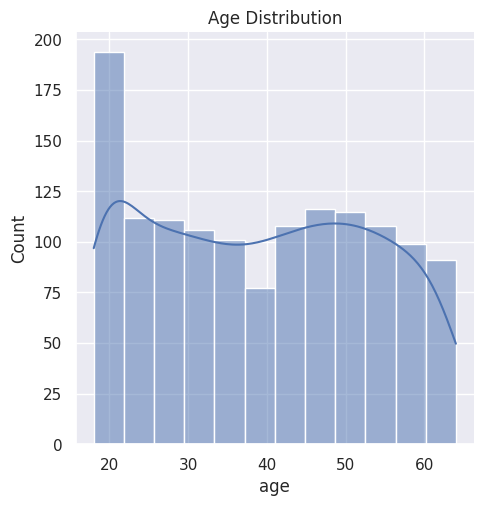

In [ ]:
# age distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'],kde=True)
plt.title('Age Distribution')
plt.show()

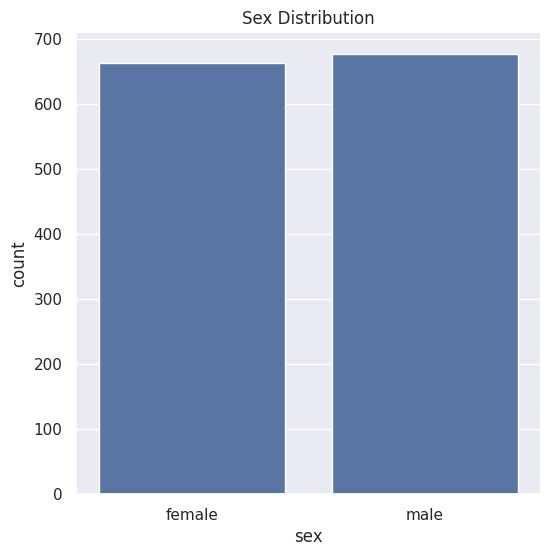

In [ ]:
#sex value_counts
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = insurance_data)
plt.title('Sex Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

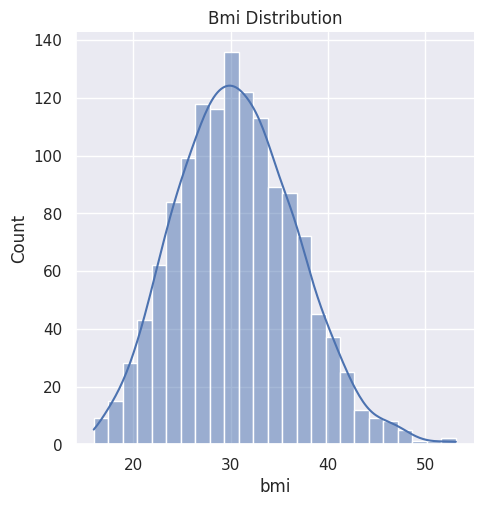

In [ ]:
#BMI Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'],kde=True)
plt.title('Bmi Distribution')
plt.show()

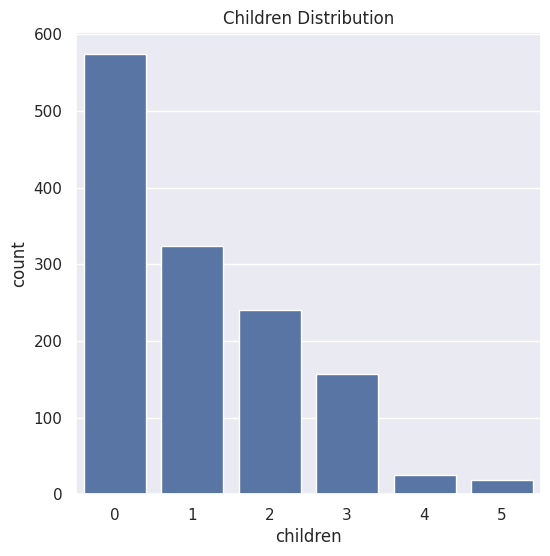

In [ ]:
#Children value_counts
plt.figure(figsize=(6,6))
sns.countplot(x='children',data = insurance_data)
plt.title('Children Distribution')
plt.show()

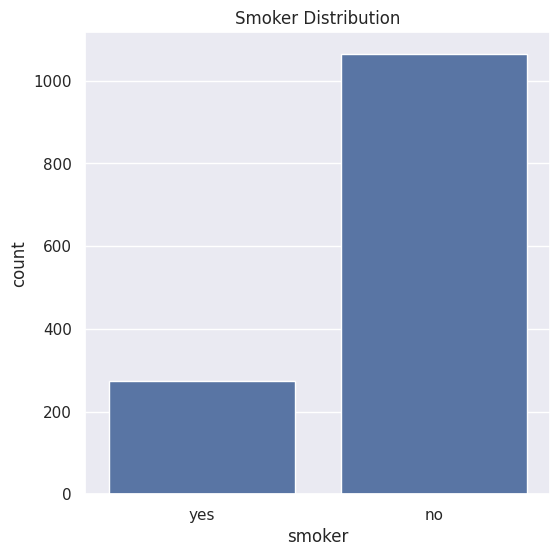

In [ ]:
#Smoker value_counts
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data = insurance_data)
plt.title('Smoker Distribution')
plt.show()

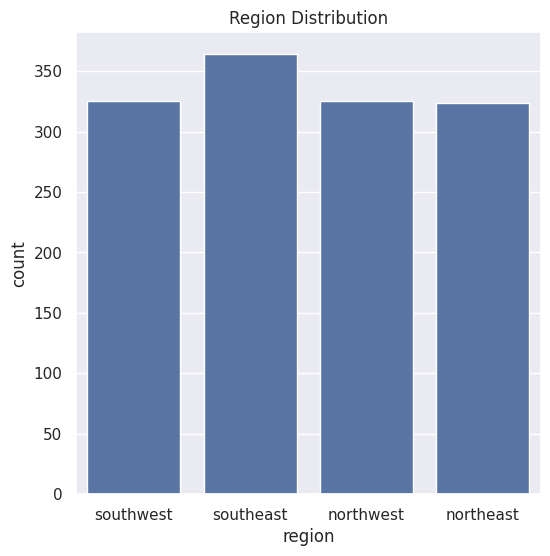

In [ ]:
#Region value_counts
plt.figure(figsize=(6,6))
sns.countplot(x='region',data = insurance_data)
plt.title('Region Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

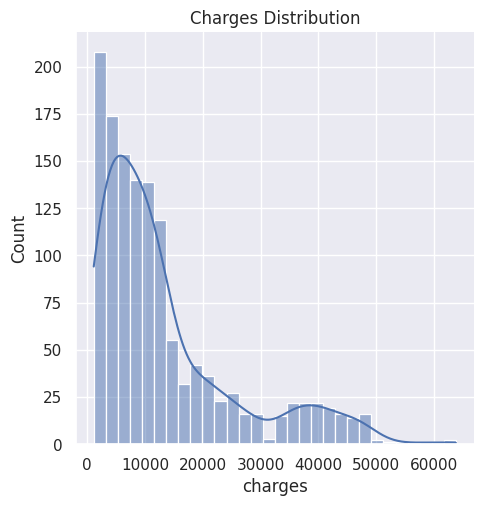

In [ ]:
#Chargers Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['charges'],kde=True)
plt.title('Charges Distribution')
plt.show()

### **3. Data Pre-processing**

In [ ]:
#Label encoding
label_encoder = LabelEncoder()

In [ ]:
columns_need_encoding=['sex','smoker','region']

In [ ]:
tracker = {}
for column in columns_need_encoding :
  insurance_data[column] = label_encoder.fit_transform(insurance_data[column])
  tracker[column] = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
for column,labels in tracker.items():
  print(column,': ',labels)

sex :  {'female': 0, 'male': 1}
smoker :  {'no': 0, 'yes': 1}
region :  {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


<Axes: >

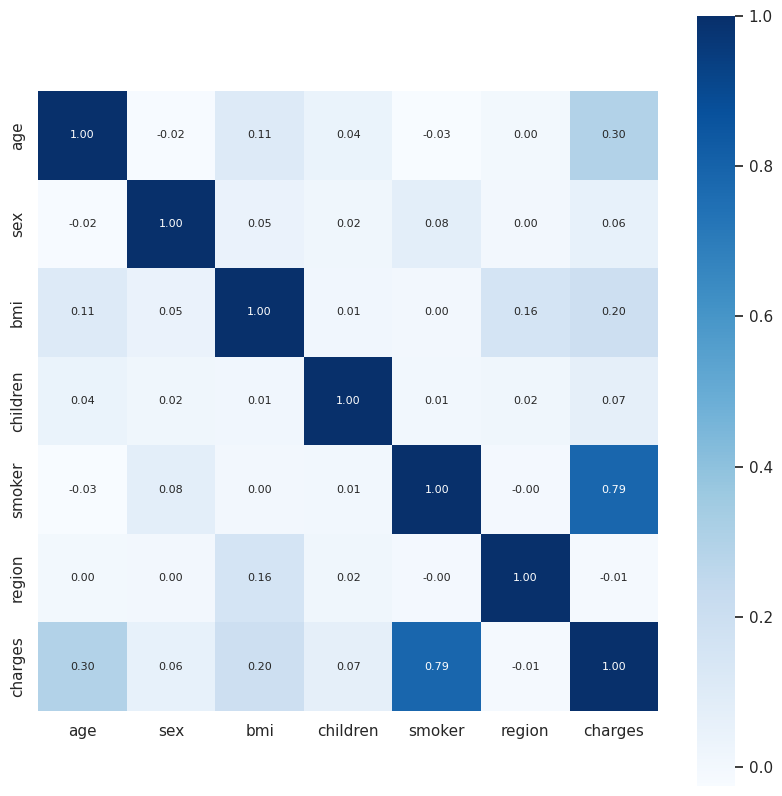

In [ ]:
#Correlation
correlation = insurance_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8},fmt='.2f',cmap='Blues')

In [ ]:
correlation['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

In [ ]:
# data splitting
features = insurance_data.drop('charges',axis=1)
target = insurance_data.charges

In [ ]:
features

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### **4. Model selection**

In [ ]:
models = [LinearRegression(),Lasso(),RandomForestRegressor(random_state=1),XGBRegressor()]

In [ ]:
for model in models:
  cv_score = cross_val_score(model,features,target,cv=5,scoring='r2')
  print('model :',model)
  print('model_scores :',cv_score)
  print('mean score :',cv_score.mean())
  print('-----------------------------------------------')

model : LinearRegression()
model_scores : [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
mean score : 0.7472559473580954
-----------------------------------------------
model : Lasso()
model_scores : [0.76126183 0.70841539 0.77784728 0.73366214 0.75513264]
mean score : 0.7472638533632837
-----------------------------------------------
model : RandomForestRegressor(random_state=1)
model_scores : [0.85350204 0.7719817  0.87054126 0.82955798 0.84990716]
mean score : 0.8350980288043012
-----------------------------------------------
model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=

**Inference**

* **Best Performing Model**: The Random Forest Regressor has the highest mean cross-validation score, indicating it is the best-performing model among the ones tested.
* **Consistency**: All models show relatively consistent performance across the cross-validation folds, with the ensemble methods (Random Forest and XGBoost) providing superior performance over linear methods (Linear Regression and Lasso).
* **Model Selection**: Based on these scores, the Random Forest Regressor would be the preferred model for this particular task, followed closely by the XGBoost Regressor.

### **5. Model Training**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=2)

In [ ]:
regressor = RandomForestRegressor(random_state=1)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(random_state=1)

### **6. Model Evaluation**

In [ ]:
#Evaluation on training data
train_data_prediction = regressor.predict(X_train)

print('R2 score :',r2_score(Y_train,train_data_prediction))
print('MAE :',mean_absolute_error(Y_train,train_data_prediction))

R2 score : 0.9777722523135497
MAE : 974.3305825546543


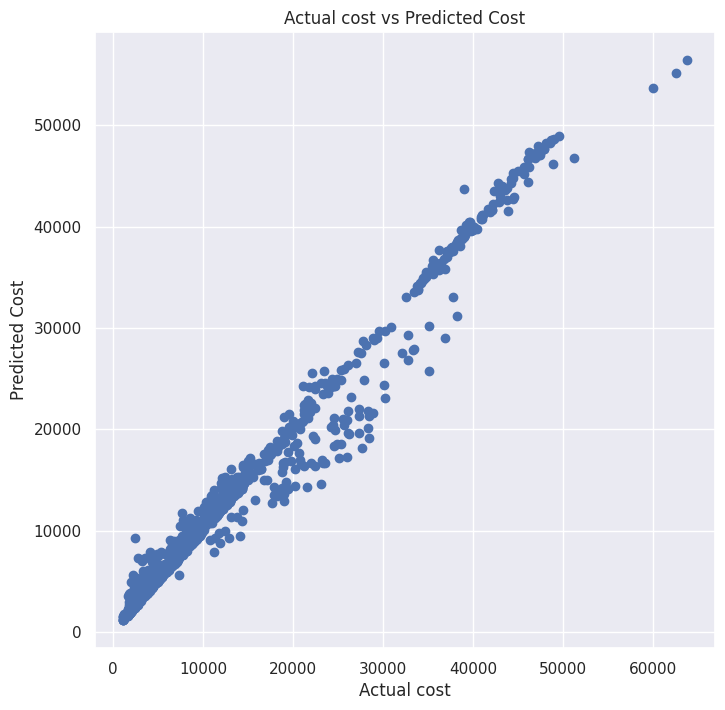

In [ ]:
# Visualizing and comparing the actual cost and predicted cost
plt.figure(figsize=(8,8))
plt.scatter(Y_train,train_data_prediction)
plt.title('Actual cost vs Predicted Cost')
plt.xlabel('Actual cost')
plt.ylabel('Predicted Cost')
plt.show()

In [ ]:
#Evaluation on test data
test_data_prediction = regressor.predict(X_test)

print('R2 score :',r2_score(Y_test,test_data_prediction))
print('MAE :',mean_absolute_error(Y_test,test_data_prediction))

R2 score : 0.832293924817586
MAE : 2751.4944266130597


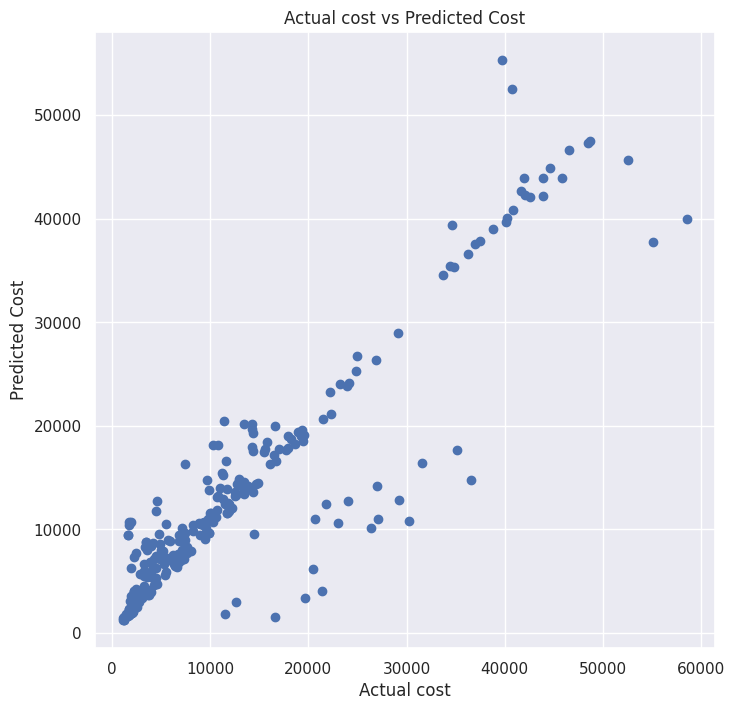

In [ ]:
# Visualizing and comparing the actual cost and predicted cost
plt.figure(figsize=(8,8))
plt.scatter(Y_test,test_data_prediction)
plt.title('Actual cost vs Predicted Cost')
plt.xlabel('Actual cost')
plt.ylabel('Predicted Cost')
plt.show()

### **7. Predictive System**

In [ ]:
def predict_insurance_cost(input_data):
  input_data = np.asarray(input_data)
  input_data = input_data.reshape(1,-1)
  df_input_data = pd.DataFrame(input_data,columns=features.columns)
  columns_need_encoding=['sex','smoker','region']
  for column in columns_need_encoding :
    df_input_data[column] = label_encoder.fit_transform(df_input_data[column])
  cost = regressor.predict(df_input_data)
  print('medical insurance cost :',cost[0],'$')

In [ ]:
predict_insurance_cost((52,'female',30.78,1,'no','northeast'))

medical insurance cost : 10750.56052150001 $
